# Problemas de transporte

Los problemas de transporte se tratan de poder generar productos en ciertas locaciones y enviarlas a los destinos a un costo mínimo.



### Objetivo General:

El objetivo es generar un correcto abastecimiento a un menor costo.

### Objetivos Específicos:

- Identificar la problemática

- Definir variables

- Obtener función objetivo 

- Definir restricciones

- Realizar cálculos

- Expresar el resultado

# Problema de abastecimiento de energía

Se tienen 4 plantas eléctricas nombradas como **G1,G2,G3 y G4** las cuáles abastecen a los puntos **C1, C2, C3 y C4**.

Las lineas lineas de abastecimiento fluyen en cualquier dirección. 

Las capacidades de producción de energía y los costos se muestran en la siguiente tabla:

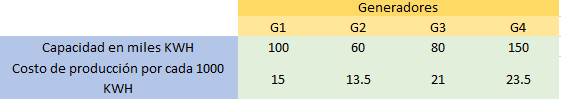

El consumo de energía es el siguiente:

- C1 : 35k KWH
- C2 : 50k KWH
- C3 : 60k KWH
- C4 : 40k KWH

No existe limitación alguna en las líneas de abastecimiento y el costo por cada 1000 KWH transmitido es de $11

El esquema del abastecimiento se muestra en la siguiente imagen:

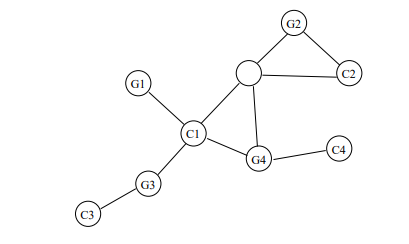

En el esquema se puede notar que además existe un nodo en blanco al que llamaremos A en el cual se puede redirigir la energía, se tiene que tomar en cuenta que toda la energía que entre a A tiene que salir de A

**Definimos nuestras variables para el problema**

Todas las X representan la cantidad de miles de KWH que pasan por alguna línea de transmisión

$x_1$ = Transmisión desde G1 hasta C1

$x_2$ = Transmisión desde G2 a C2

$x_3$ = Transmisión desde G2 a nodo A

$x_4$ = Transmisión desde nodo A a C2

$x_5$ = Transmisión desde nodo A a C1

$x_6$ = Transmisión desde G4 a nodo A

$x_7$ = Transmisión desde G4 a C1

$x_8$ = Transmisión desde G4 a C4

$x_9$ = Transmisión desde G3 a C1

$x_{10}$ = Transmisión desde G3 a C3


**Definimos nuestras restricciones**

Restricciones de produccion


$$ x_1 <= 100 $$
$$ x_2+x_3 <= 60 $$
$$ x_3+x_6-x_4-x_5 = 0$$
$$ x_6+x_7+x_8 <= 150 $$
$$ x_9 +x_{10} <= 80 $$


Restricciones de abastecimiento


$$ x_1+x_5+x_7 +x_9>= 35 $$
$$ x_{10} >= 60 $$
$$ x_8 >= 40 $$
$$ x_2+x_4 >=50 $$

**Definimos nuestra función a optimizar (minimizar) en este caso el costo total:**


$$ (15+11)x_1+(13.5+11)x_2+(13.5+11)x_3+11x_4+11x_5+(23.5+11)x_6+(23.5+11)x_7+(23.5+11)x_8+(21+11)x_9+(21+11)x_{10} $$

In [40]:
from scipy.optimize import linprog

In [41]:
c = [26.0,24.5,24.5,11,11,33.5,33.5,33.5,32,32]

Aub = [[1,0,0,0,0,0,0,0,0,0], #Produccion de G1
     [0,1,1,0,0,0,0,0,0,0], #Produccion de G2
     [0,0,0,0,0,1,1,1,0,0], #Produccion de G4
     [0,0,0,0,0,0,0,0,1,1], #Produccion de G3
     [-1,0,0,0,-1,0,-1,0,-1,0], #Abastecimiento a C1
     [0,0,0,0,0,0,0,0,0,-1], #Abastecimiento a C3
      [0,0,0,0,0,0,0,-1,0,0], #Abastecimiento a C4
      [0,-1,0,-1,0,0,0,0,0,0]] #Abastecimiento a C2

Aeq = [[0,0,1,-1,-1,1,0,0,0,0]]

bub = [100,60,150,80,-35,-60,-40,-50]

beq = [0]

In [42]:
res = linprog(c=c,A_ub=Aub,b_ub=bub,A_eq=Aeq,b_eq=beq,method="interior-point")
print(res)

     con: array([2.80269471e-21])
     fun: 5394.999999186727
 message: 'Optimization terminated successfully.'
     nit: 6
   slack: array([ 6.50000000e+01,  1.00000000e+01,  1.10000000e+02,  2.00000000e+01,
       -1.37991734e-08,  1.90532035e-10,  4.82060614e-10, -2.11596358e-08])
  status: 0
 success: True
       x: array([3.50000000e+01, 5.00000000e+01, 1.79902361e-09, 7.97149235e-10,
       1.53011886e-09, 5.28244482e-10, 1.56079664e-09, 4.00000000e+01,
       3.17694210e-10, 6.00000000e+01])


In [43]:
names=["Transmisión desde G1 hasta C1","Transmisión desde G2 a C2","Transmisión desde G2 a nodo A",
       "Transmisión desde nodo A a C2","Transmisión desde nodo A a C1","Transmisión desde G4 a nodo A",
       "Transmisión desde G4 a C1","Transmisión desde G4 a C4","Transmisión desde G3 a C1","Transmisión desde G3 a C3"]

In [44]:
for a,b in enumerate(names):
    print("La cantidad de KWH en {} es: {} ".format(b,res.x[a]))

La cantidad de KWH en Transmisión desde G1 hasta C1 es: 34.99999998279222 
La cantidad de KWH en Transmisión desde G2 a C2 es: 49.99999997804321 
La cantidad de KWH en Transmisión desde G2 a nodo A es: 1.7990236111164399e-09 
La cantidad de KWH en Transmisión desde nodo A a C2 es: 7.971492351902241e-10 
La cantidad de KWH en Transmisión desde nodo A a C1 es: 1.5301188582230673e-09 
La cantidad de KWH en Transmisión desde G4 a nodo A es: 5.282444822940489e-10 
La cantidad de KWH en Transmisión desde G4 a C1 es: 1.560796641793232e-09 
La cantidad de KWH en Transmisión desde G4 a C4 es: 40.00000000048206 
La cantidad de KWH en Transmisión desde G3 a C1 es: 3.176942095516874e-10 
La cantidad de KWH en Transmisión desde G3 a C3 es: 60.00000000019053 


El costo total fue de **5394.99**

**Los resultados muestran algo interesante, ya que al parecer lo más óptimo es no usar toda la red de abastecimiento y usar la planta mas cercana para abastecer de energía a cada punto. En este sentido vemos como desaparece por completo el nodo A ya que es innecesario dadas los requerimientos energéticos.**

**Probablemente si la demanda en alguno de los puntos aumentara entonces se necesitaría hacer uso de toda la red**

**En la siguiente imagen vemos el sistema optimizado**

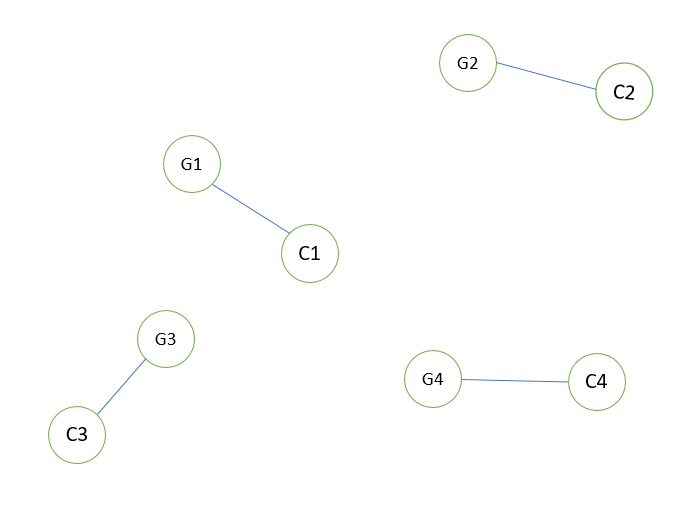

**Si en cambio, subimos la necesidad energética de C2 a 80k KWH y C1 a 220 KWH el resultado es el siguiente**

In [45]:
c = [26.0,24.5,24.5,11,11,33.5,33.5,33.5,32,32]

Aub = [[1,0,0,0,0,0,0,0,0,0], #Produccion de G1
     [0,1,1,0,0,0,0,0,0,0], #Produccion de G2
     [0,0,0,0,0,1,1,1,0,0], #Produccion de G4
     [0,0,0,0,0,0,0,0,1,1], #Produccion de G3
     [-1,0,0,0,-1,0,-1,0,-1,0], #Abastecimiento a C1
     [0,0,0,0,0,0,0,0,0,-1], #Abastecimiento a C3
      [0,0,0,0,0,0,0,-1,0,0], #Abastecimiento a C4
      [0,-1,0,-1,0,0,0,0,0,0]] #Abastecimiento a C2

Aeq = [[0,0,1,-1,-1,1,0,0,0,0]]

bub = [100,60,150,80,-220,-60,-40,-80]

beq = [0]

In [46]:
res = linprog(c=c,A_ub=Aub,b_ub=bub,A_eq=Aeq,b_eq=beq,method="interior-point")
print(res)

     con: array([-6.44091003e-10])
     fun: 5970.690026210886
 message: 'The algorithm terminated successfully and determined that the problem is infeasible.'
     nit: 6
   slack: array([  72.24779668,   42.00152729,   77.55933966,   12.69343241,
       -157.95439242,    0.43561817,    0.35223716,  -57.33555895])
  status: 2
 success: False
       x: array([27.75220332,  3.3224499 , 14.67602282, 19.34199115,  1.3487247 ,
        6.01469303, 26.07373014, 40.35223716,  6.87094942, 60.43561817])


In [47]:
for a,b in enumerate(names):
    print("La cantidad de KWH en {} es: {} ".format(b,res.x[a]))

La cantidad de KWH en Transmisión desde G1 hasta C1 es: 27.75220332227814 
La cantidad de KWH en Transmisión desde G2 a C2 es: 3.322449897003867 
La cantidad de KWH en Transmisión desde G2 a nodo A es: 14.676022816294399 
La cantidad de KWH en Transmisión desde nodo A a C2 es: 19.341991151046315 
La cantidad de KWH en Transmisión desde nodo A a C1 es: 1.3487246958339065 
La cantidad de KWH en Transmisión desde G4 a nodo A es: 6.014693031229914 
La cantidad de KWH en Transmisión desde G4 a C1 es: 26.07373014472886 
La cantidad de KWH en Transmisión desde G4 a C4 es: 40.352237159932905 
La cantidad de KWH en Transmisión desde G3 a C1 es: 6.87094942156309 
La cantidad de KWH en Transmisión desde G3 a C3 es: 60.43561816555544 


**En este caso la necesidad energética de C1 es tanta que si se usa todo el sistema de abastecimiento de la siguiente manera:**

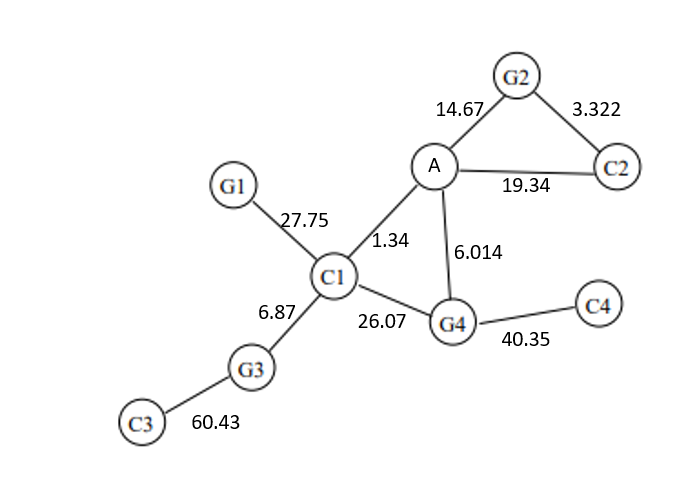

Con un costo total de **5970.69**

### Concluisones

Durante la realización de este proyecto logramos cumplir cada uno de nuestros objetivos específicos de manera adecuada, unos nos costaron más trabajo que otros. Al final juntando la información obtenida pudimos cumplir con nuestro objetivo general y representamos un resultado optimo y viable para el problema planteado. Y tambien se representó otro resultado para una variación del problema principal. 
 
De manera más personal, este proyecto, y en específico este problema nos presentó varios retos durante su realización. Los cuales resolvimos investigando, ya sea en videos, tutoriales o incluso preguntando con personas más experimentadas en el tema. Al final logramos realizar el proyecto y sentimos que nos dejó un buen aprendizaje, ya que aparte de usar nuestros conocimientos actuales, pudimos obtener más durante su realización. 